## Sabrina Ruiz 
# BrainStation Capstone: Book Rating Predictor
## *Text Data Analysis*

# Introduction
In this notebook, I will optimize the text vectorization and processing for the `review` column of my cleaned data. I will create a custom tokenizer to best fit my data set. Lastly, I will test the text processing through a basic model.  

# Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
stemmer = nltk.stem.PorterStemmer()
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.compose import ColumnTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\missruiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('../data/combined_book_data_cleaned.csv')
data.head()

,Unnamed: 0,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005-01-01,Biography & Autobiography
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005-01-01,Biography & Autobiography
3,3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,2005-01-01,Biography & Autobiography
4,4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,2005-01-01,Biography & Autobiography


# Exploring 'Positive' 'Negative' Sentiment
for the purposes of Sprint 2, I will convert the `review_score` to a binary representing *positive* and *negative* sentiment. If time permits, I might explore the possibility of a multiclass classifier. A multiclass system would perhaps addresess my current data imbalance issue, where the majority (88%) of my data is currently positive sentiment.  

In [4]:
pos_neg_df = data.copy()
pos_neg_df.head(2)

,Unnamed: 0,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005-01-01,Biography & Autobiography


In [5]:
pos_neg_df['review_score'] = np.where(pos_neg_df['review_score'] >= 3, 1, 0)
pos_neg_df.head()

,Unnamed: 0,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,1,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005-01-01,Biography & Autobiography
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,1,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005-01-01,Biography & Autobiography
3,3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,2005-01-01,Biography & Autobiography
4,4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,2005-01-01,Biography & Autobiography


In [6]:
# change column name to reflect changes
pos_neg_df.rename(columns={"review_score": "sentiment"}, inplace=True)
pos_neg_df.head()

,Unnamed: 0,Id,Title,User_id,profileName,sentiment,review_summary,review,authors,publishedDate,categories
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,1,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005-01-01,Biography & Autobiography
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,1,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005-01-01,Biography & Autobiography
3,3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,2005-01-01,Biography & Autobiography
4,4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,2005-01-01,Biography & Autobiography


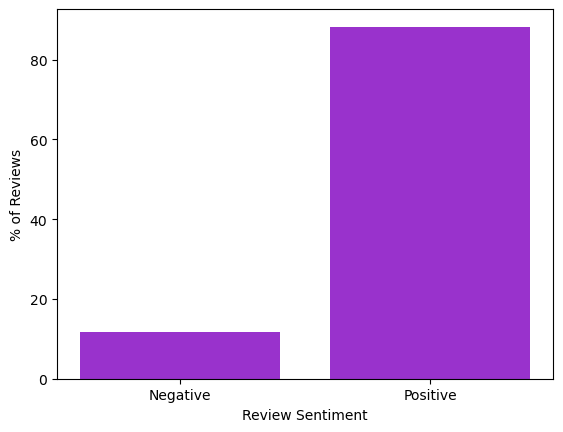

Class imbalance: [0.12 0.88]


In [7]:
values, counts = np.unique(pos_neg_df['sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["Negative", "Positive"], normalized_counts*100, color = 'darkorchid') # plot normalized counts
plt.xlabel('Review Sentiment')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

This is quite inbalanced! 

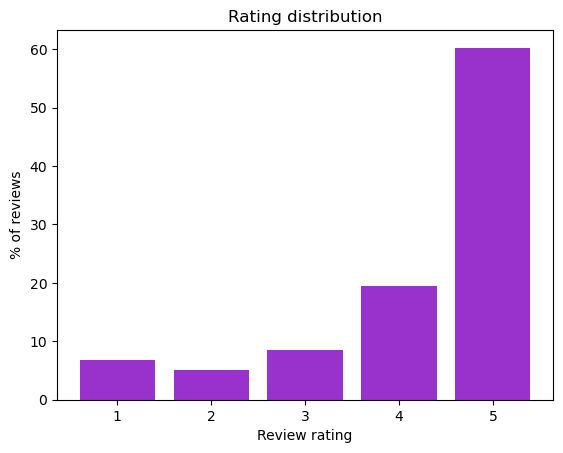

In [8]:
values, counts = np.unique(data['review_score'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100, color ='darkorchid')
plt.xlabel('Review rating')
plt.ylabel('% of reviews')
plt.title("Rating distribution")
plt.show()

In [9]:
data.isna().sum(axis=0) 

Unnamed: 0             0
Id                     0
Title                  0
User_id                0
profileName            0
review_score           0
review_summary       407
review                 8
authors                5
publishedDate     354581
categories        551290
dtype: int64

In [10]:
#I will move this to the EDA file if this review column still has missing values there as well
# (my current working EDA file does not show null review data)
data.dropna(subset=['review'], inplace=True)

In [11]:
data.isna().sum(axis=0) 

Unnamed: 0             0
Id                     0
Title                  0
User_id                0
profileName            0
review_score           0
review_summary       407
review                 0
authors                5
publishedDate     354579
categories        551288
dtype: int64

# Preprocessing

In [12]:
#Which is my final working dataframe?
modeling_df = data

In [13]:
X = modeling_df.drop('review_score', axis=1)
y = modeling_df['review_score']

In [14]:
# splitting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18)

#### First Vectorizer
I will put my dataset through various versions of a CountVectorizer to see which yields the best results. First, I will start off with a standard one of simple English stop words and max the features at 500. 

In [17]:
working_cv = CountVectorizer(stop_words="english", min_df=10, max_features=50)

In [18]:
working_cv.fit(X_train['review'])
X_train_transformed = working_cv.transform(X_train['review'])
X_test_transformed = working_cv.transform(X_test['review'])

X_test_transformed.shape

MemoryError: 

In [ ]:
#visualizing most common  wds

word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=working_cv.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Although 65% may seem low, this is simply a baseline score. There was no hyperoptimization or customization done. From the simple logistic regression, here is a viualization of the top words with positive sentiment:

In [ ]:
#visualizing positive sentiment 
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=working_cv.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()


The words do not seem to have positive sentiment, but rather the opposite. It seems I have misinterpreted my input.

#### Using a Custom Tokenizer

Next, I will attempt to create a custom tokenizer to best fit and optimize the model.

In [ ]:
#words aside from stop words to ignore
MY_STOP_WORDS = stopwords.words('english')
GENERIC_WORDS = ["book" , "author" , "read" , "character" , "story" , "page" , "write" , "series" , "review"]
MY_STOP_WORDS.extend(GENERIC_WORDS)

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in MY_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [ ]:
MY_STOP_WORDS

In [ ]:
# sanity check
sentence = "Can you believe that: his (dog) like, read my book!"
my_tokenizer(sentence)

The words on my added stop list seem to be removed as well! This seems like a good start. I will put this tokenizer to the test. 

In [ ]:
custom_cv = CountVectorizer(min_df=5, 
                            max_features=1000,
                             tokenizer=my_tokenizer
                            )
custom_cv.fit(X_train)

X_train_custom_transformed = custom_cv.transform(X_train)
X_test_custom_transformed = custom_cv.transform(X_test)

X_train_custom_transformed.shape

Upon reruning the cell for final submission, this error message appeared. It seems something changed since the last run, so I will address this  at a later date. 

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_custom_transformed.toarray().sum(axis=0)},
    index=custom_cv.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#HAHA ITS JUST THE INDEX

In [ ]:
# Fitting a model
logreg_for_custom_cv = LogisticRegression(C = 0.1)
logreg_for_custom_cv.fit(X_train_custom_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_custom_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_custom_transformed, y_test)}")

# Notes for Next Steps

Moving forward, I will work on the following steps:
1. address data inbalance
    - perhaps downsize positive sentiment data, or change the positive sentiment cutoff point
2. get TO Modeling
    - I will decide between a “recommendation” system or with a simple rating predictor as before. At the moment, I am leaning toward a real recommendation system as opposed to a simple output list based off top predicted ratings. 
    - Perhaps I wil do unsupervised -cluster --> recommender
3. sentiment classifying Tweaks
    - It seems I must fix my custom tokenizer - fix stemming, common words, add web embedding upon recommendation of instructor following today's presentation

### multiclass classification
One thing I can look into is perhaps testing a multiclass classifier as a way to address the data inbalance. 
    

### Some personal notes to be deleted
    - Multiclassifier: wont inherinly understand 5 is good, 0 bad, but all the ratings will be categorized as such. 
    - ordinal regression model
    - ordinal encoding
    - see if the model does better this way?
    -would be a way to address the data imbalance
    
    -neaural net
    decision tree
    svms
    knn